## Explore the Input Variables

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [97]:
# read in relevant datasets

# input gentrifying lsoas dataset from 1st clustering round
cluster_1_gen = pd.read_csv("cluster_1_gen.csv").drop(columns=["Unnamed: 0"])

# input variables for clustering
cluster_2_data = pd.read_csv("cluster_2_data.csv").drop(columns=["Unnamed: 0"])
radar_2 = pd.read_csv("radar4.csv").drop(columns=["Unnamed: 0"])

In [3]:
cluster_1_gen.head()

,LSOA_Code,conv_rates,newblt_rates,avg_churn_01_10,agePop_chg,hse_noKids_chg,hse_depKids_chg,hse_noDepKids_chg,agePop_01,cluster_1_yeoJohnson_decile_labels,cluster_1_yJ_decile_cat
0,E01000121,3.85356,1.92678,0.2017,4.61,1.03,-9.81,6.99,13.50,1,GEN
1,E01000126,3.58423,2.38949,0.2198,3.41,-0.02,-10.98,7.60,5.56,1,GEN
2,E01000152,2.57069,0.00000,0.3912,0.51,9.06,-15.21,2.27,4.63,1,GEN
3,E01000154,5.97907,0.00000,0.4297,-0.92,3.63,-3.66,2.33,9.42,1,GEN
4,E01000189,1.90718,2.54291,0.5491,-0.38,9.71,-10.05,2.28,6.06,1,GEN


In [4]:
cluster_2_data = cluster_2_data.set_index("LSOA11CD")
cluster_2_data.head()

,SEC1_chg,SEC2_chg,SEC3_chg,SEC4_chg,SEC5_chg,SEC6_chg,SEC7_chg,hseP_chg,inc_chg,owned_chg,socRent_chg,pteRent_chg,inc_01,hseP_01
LSOA11CD,,,,,,,,,,,,,,
E01000001,2.31,-8.08,-0.67,3.13,-0.17,0.24,0.52,64.864185,27.016178,-3.68,-2.19,9.72,65.52,497.00
E01000002,5.15,-5.28,-2.72,0.19,-0.79,-0.61,0.02,53.947991,50.720965,-11.13,-2.26,17.49,66.30,528.75
E01000003,8.30,-0.82,-0.44,2.54,-1.25,-1.50,0.22,71.548657,16.828593,-2.87,-6.45,11.34,54.14,335.00
E01000005,3.34,-7.61,-2.85,0.26,-2.63,-2.35,2.16,0.000000,4.182713,-1.35,2.49,0.36,46.74,300.00
E01000006,-0.43,-2.69,-0.58,3.52,-0.27,-0.72,3.76,75.537634,4.884817,-15.25,1.18,13.89,38.20,232.50


In [5]:
# extract only LSOA codes for gentrifying LSOAs

cluster_2 = cluster_1_gen.drop(cluster_1_gen.columns[1:11],axis=1)

In [7]:
cluster_2_data= cluster_2_data.rename(columns = {
 'inc_01':'inc_11',
 'hseP_01':'hseP_11'})

In [8]:
cluster_2_data.head()

,SEC1_chg,SEC2_chg,SEC3_chg,SEC4_chg,SEC5_chg,SEC6_chg,SEC7_chg,hseP_chg,inc_chg,owned_chg,socRent_chg,pteRent_chg,inc_11,hseP_11
LSOA11CD,,,,,,,,,,,,,,
E01000001,2.31,-8.08,-0.67,3.13,-0.17,0.24,0.52,64.864185,27.016178,-3.68,-2.19,9.72,65.52,497.00
E01000002,5.15,-5.28,-2.72,0.19,-0.79,-0.61,0.02,53.947991,50.720965,-11.13,-2.26,17.49,66.30,528.75
E01000003,8.30,-0.82,-0.44,2.54,-1.25,-1.50,0.22,71.548657,16.828593,-2.87,-6.45,11.34,54.14,335.00
E01000005,3.34,-7.61,-2.85,0.26,-2.63,-2.35,2.16,0.000000,4.182713,-1.35,2.49,0.36,46.74,300.00
E01000006,-0.43,-2.69,-0.58,3.52,-0.27,-0.72,3.76,75.537634,4.884817,-15.25,1.18,13.89,38.20,232.50


In [9]:
cluster_2.head()

,LSOA_Code
0,E01000121
1,E01000126
2,E01000152
3,E01000154
4,E01000189


In [10]:
# merge gentrifying LSOAs with their corresponding input variables

cluster_2 = cluster_2.merge(cluster_2_data, left_on="LSOA_Code", right_on="LSOA11CD",how="left").set_index("LSOA_Code")

In [11]:
cluster_2.head()

,SEC1_chg,SEC2_chg,SEC3_chg,SEC4_chg,SEC5_chg,SEC6_chg,SEC7_chg,hseP_chg,inc_chg,owned_chg,socRent_chg,pteRent_chg,inc_11,hseP_11
LSOA_Code,,,,,,,,,,,,,,
E01000121,2.96,-0.53,-3.83,0.82,-0.01,-1.59,0.41,168.031500,27.686454,-1.91,-1.31,3.81,32.85,200.00
E01000126,4.67,-0.15,-1.29,2.02,-1.37,-1.26,1.97,119.117279,35.426247,4.12,-1.59,4.41,28.27,199.95
E01000152,11.34,5.48,-1.57,0.44,-0.89,-5.98,-0.59,125.678733,19.698401,29.34,-32.98,4.28,27.52,221.00
E01000154,5.96,1.42,0.16,-1.32,-2.86,-5.43,-0.48,88.673709,31.224265,-1.12,-4.87,3.03,27.20,213.00
E01000189,14.89,7.59,-2.15,2.64,-1.52,-5.97,-4.21,69.650206,37.515113,18.41,-35.32,11.35,31.43,243.00


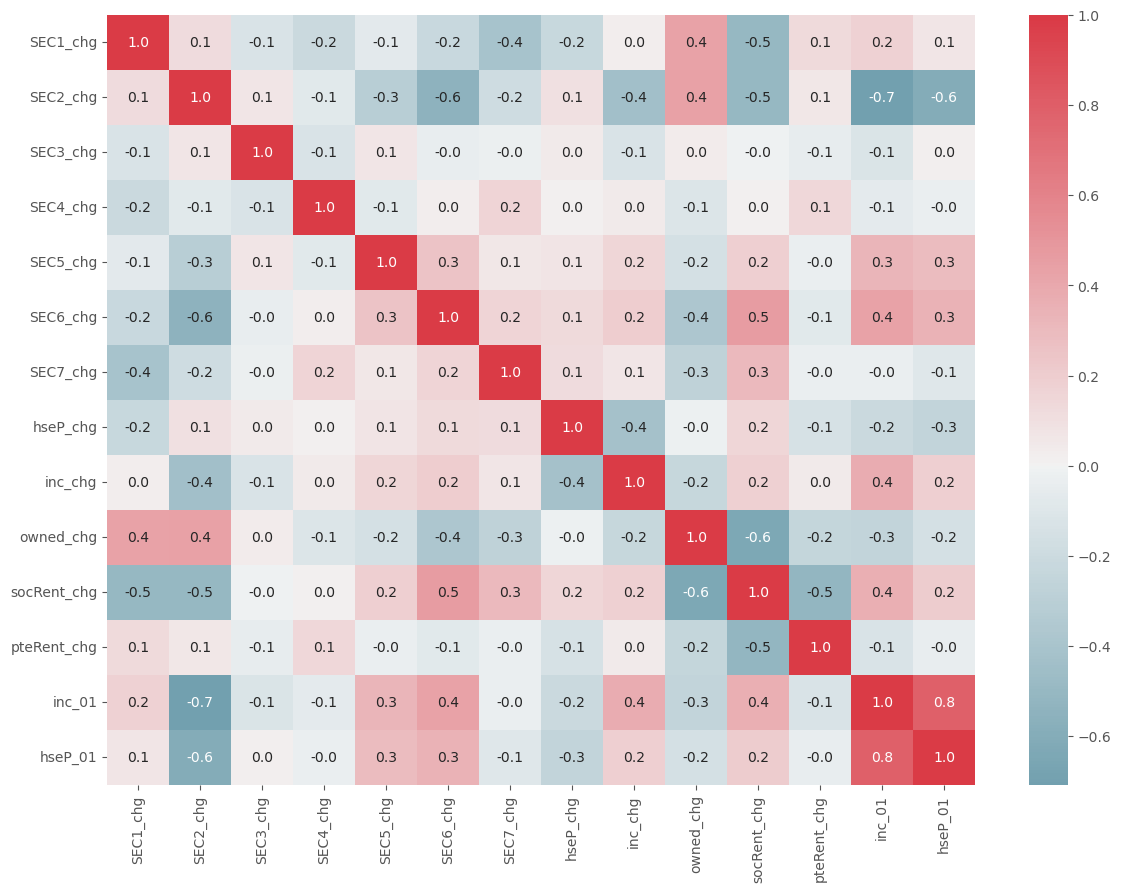

In [62]:
# check for multi-collinearity between variables

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_2.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")

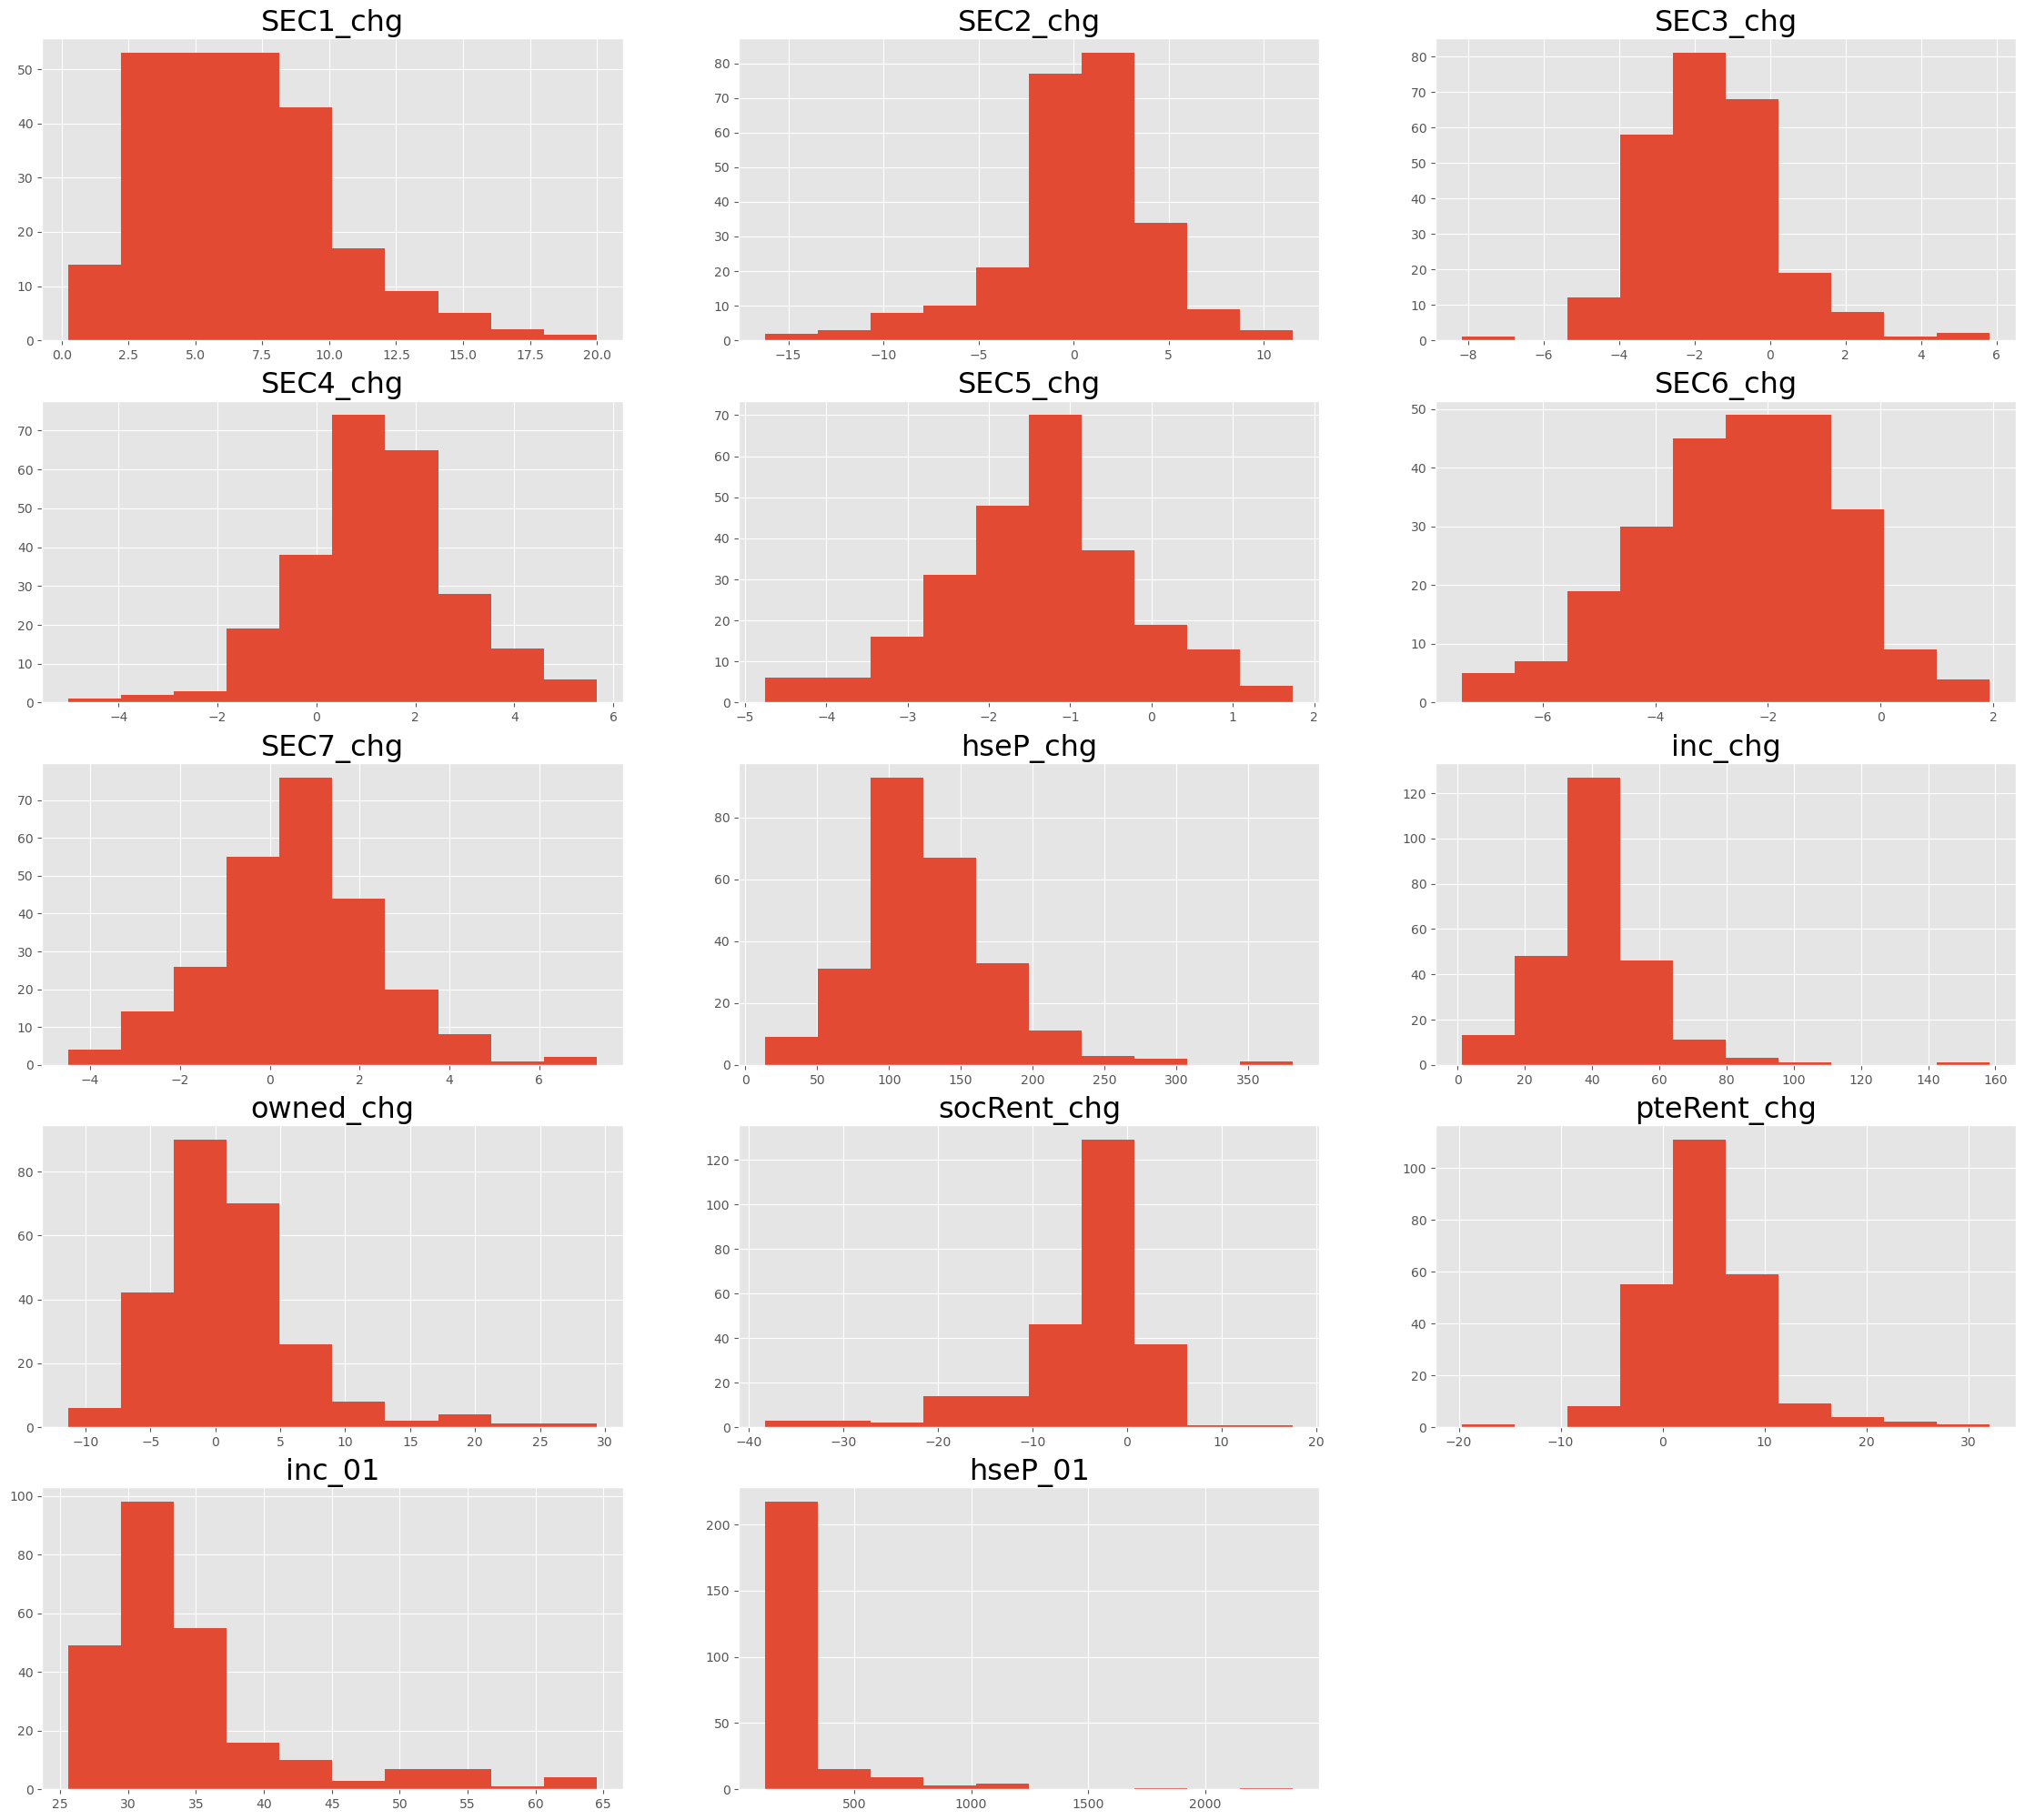

In [63]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(28, 25))

counter = 0
for i in range(5):
    for j in range(3):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_2.columns):

            ax.hist(cluster_2[cluster_2.columns[counter]], label='{}'.format(cluster_2.columns[counter]))
            ax.set_title(cluster_2.columns[counter], fontsize=23)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1
plt.savefig('Cluster_1_hist.png', dpi = 100)
plt.show()

# to output high-resolution image - uncomment the next line

In [12]:
## Transforming the Input Variables

In [13]:
# without any transformation

cluster_2_noTrans = cluster_2[:]

In [14]:
# applying cube root transformation to data variables

cluster_2_cubeRoot = np.cbrt(cluster_2)

In [15]:
cluster_2_cubeRoot.head()

,SEC1_chg,SEC2_chg,SEC3_chg,SEC4_chg,SEC5_chg,SEC6_chg,SEC7_chg,hseP_chg,inc_chg,owned_chg,socRent_chg,pteRent_chg,inc_11,hseP_11
LSOA_Code,,,,,,,,,,,,,,
E01000121,1.435811,-0.809267,-1.564587,0.935990,-0.215443,-1.167165,0.742896,5.518193,3.025212,-1.240731,-1.094184,1.561858,3.202667,5.848035
E01000126,1.671497,-0.531329,-1.088587,1.264107,-1.110641,-1.080082,1.253590,4.920300,3.284292,1.603119,-1.167165,1.639883,3.046318,5.847548
E01000152,2.246662,1.763032,-1.162251,0.760590,-0.961900,-1.815099,-0.838721,5.009033,2.700704,3.084277,-3.206886,1.623608,3.019137,6.045944
E01000154,1.813074,1.123991,0.542884,-1.096961,-1.419456,-1.757654,-0.782974,4.459282,3.148938,-1.038499,-1.695026,1.447041,3.007389,5.972093
E01000189,2.460169,1.965232,-1.290663,1.382085,-1.149779,-1.814087,-1.614708,4.114409,3.347614,2.640490,-3.281005,2.247322,3.155839,6.240251


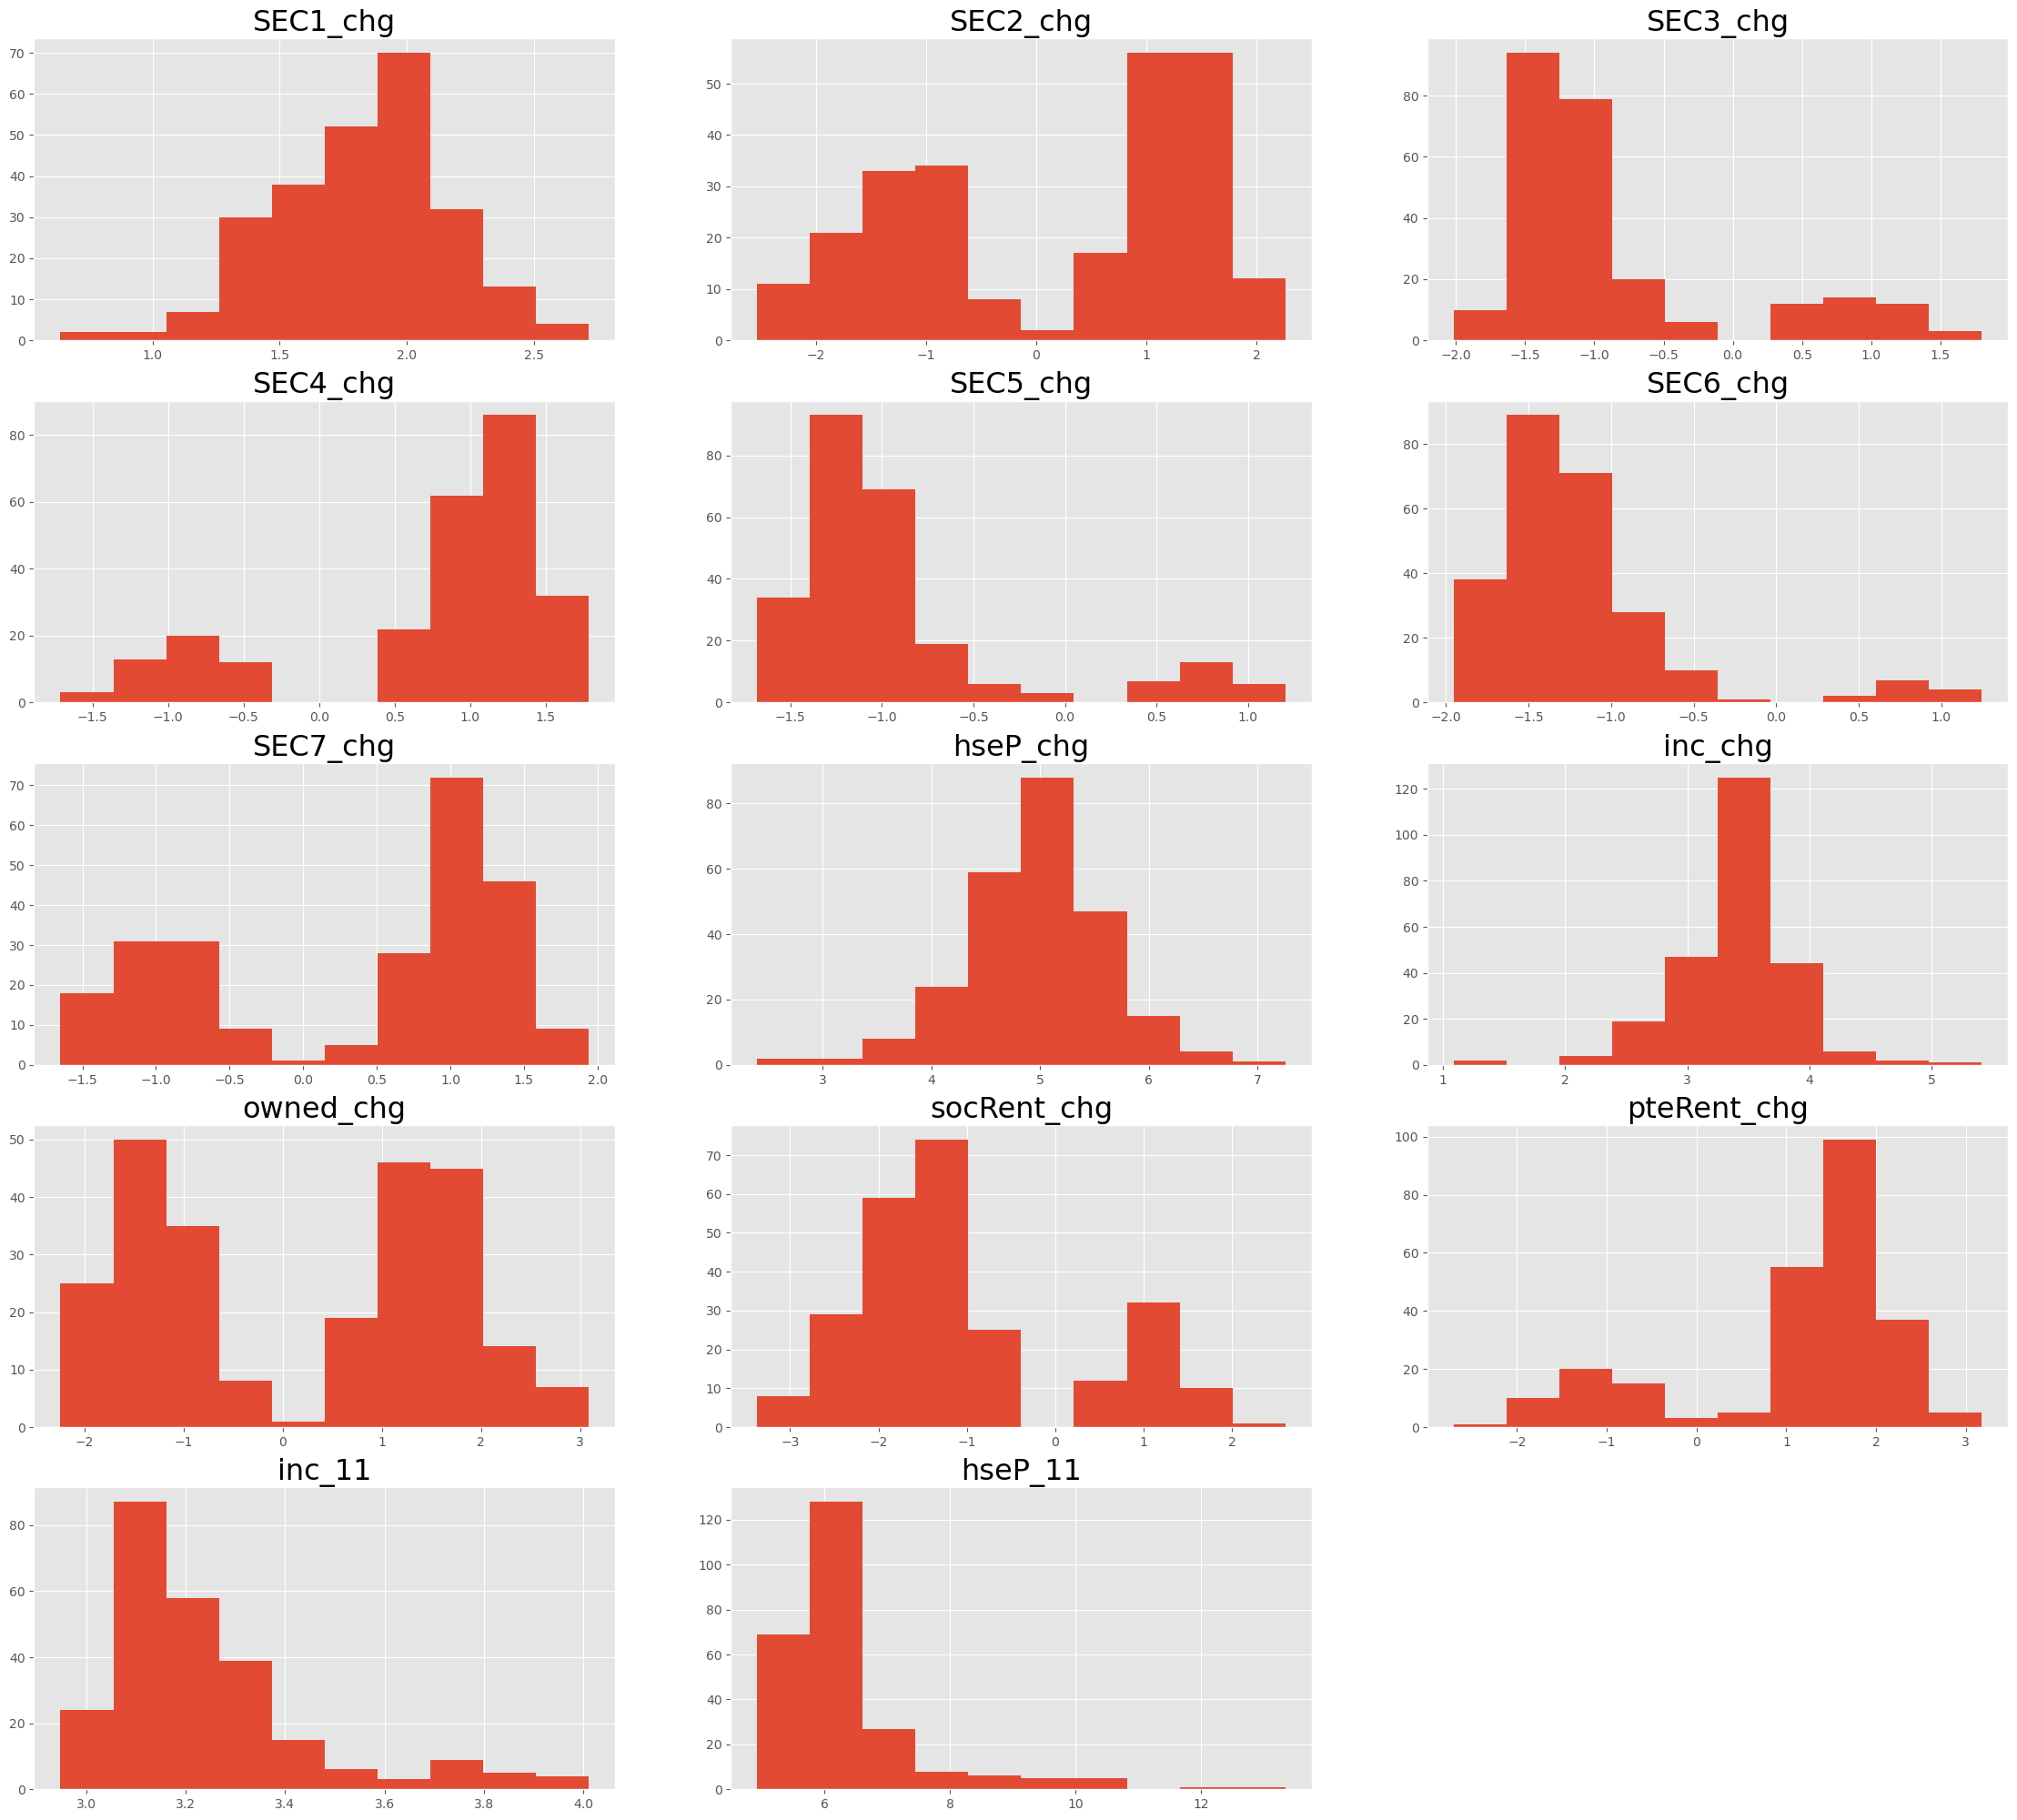

In [16]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(28, 25))

counter = 0
for i in range(5):
    for j in range(3):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_2_cubeRoot.columns):

            ax.hist(cluster_2_cubeRoot[cluster_2_cubeRoot.columns[counter]], label='{}'.format(cluster_2_cubeRoot.columns[counter]))
            ax.set_title(cluster_2_cubeRoot.columns[counter], fontsize=23)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1
        
plt.savefig('Cluster_1_hist.png', dpi = 100)
plt.show()

# to output high-resolution image - uncomment the next line


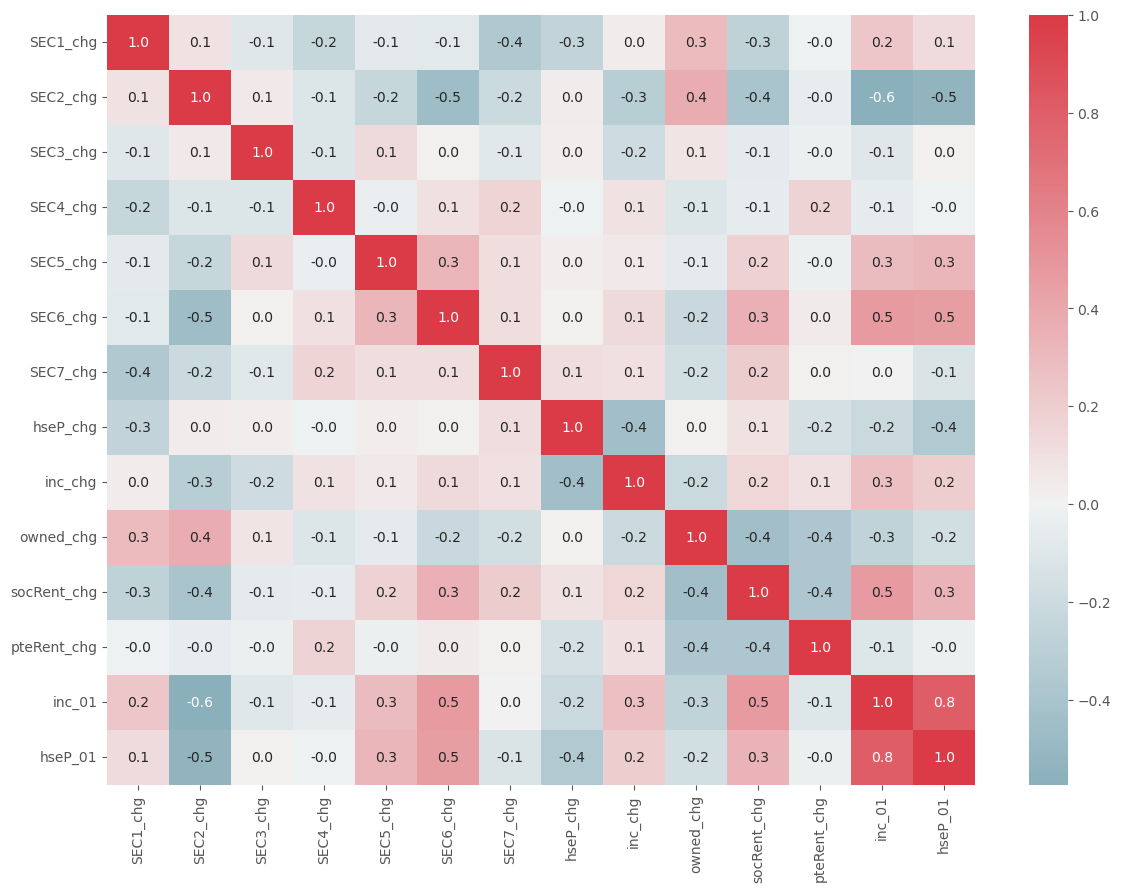

In [69]:
# check for multi-collinearity between variables

fig10, ax = plt.subplots()
fig10.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_2_cubeRoot.corr(), cmap=cmap, annot=True, fmt=".1f", center=0)

In [17]:
# applying the Yeo-Johnson transformation to data variables

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(cluster_2)

cluster_2_yeoJohnson = pt.transform(cluster_2)

In [18]:
cluster_2_yeoJohnson = pd.DataFrame(cluster_2_yeoJohnson, index = cluster_2.index, columns = cluster_2.columns)

In [19]:
cluster_2_yeoJohnson.head()

,SEC1_chg,SEC2_chg,SEC3_chg,SEC4_chg,SEC5_chg,SEC6_chg,SEC7_chg,hseP_chg,inc_chg,owned_chg,socRent_chg,pteRent_chg,inc_11,hseP_11
LSOA_Code,,,,,,,,,,,,,,
E01000121,-1.169330,-0.303254,-1.370972,-0.281112,1.203617,0.451087,-0.088014,0.881646,-0.850433,-0.484667,0.334321,-0.027678,0.077420,-0.420407
E01000126,-0.497525,-0.209450,0.232930,0.478523,0.016415,0.650185,0.757041,-0.096617,-0.295912,0.661291,0.288685,0.080341,-1.308412,-0.421380
E01000152,1.307957,1.572946,0.066467,-0.518143,0.424704,-1.866760,-0.647373,0.044696,-1.496530,3.717488,-3.071143,0.056980,-1.631727,-0.057039
E01000154,-0.071372,0.229675,1.030338,-1.583241,-1.204924,-1.598814,-0.585001,-0.808287,-0.589811,-0.289671,-0.185176,-0.168926,-1.780933,-0.185538
E01000189,2.017613,2.338913,-0.287724,0.875931,-0.109408,-1.861929,-2.759642,-1.315090,-0.155310,2.504266,-3.275318,1.303720,-0.265979,0.245637


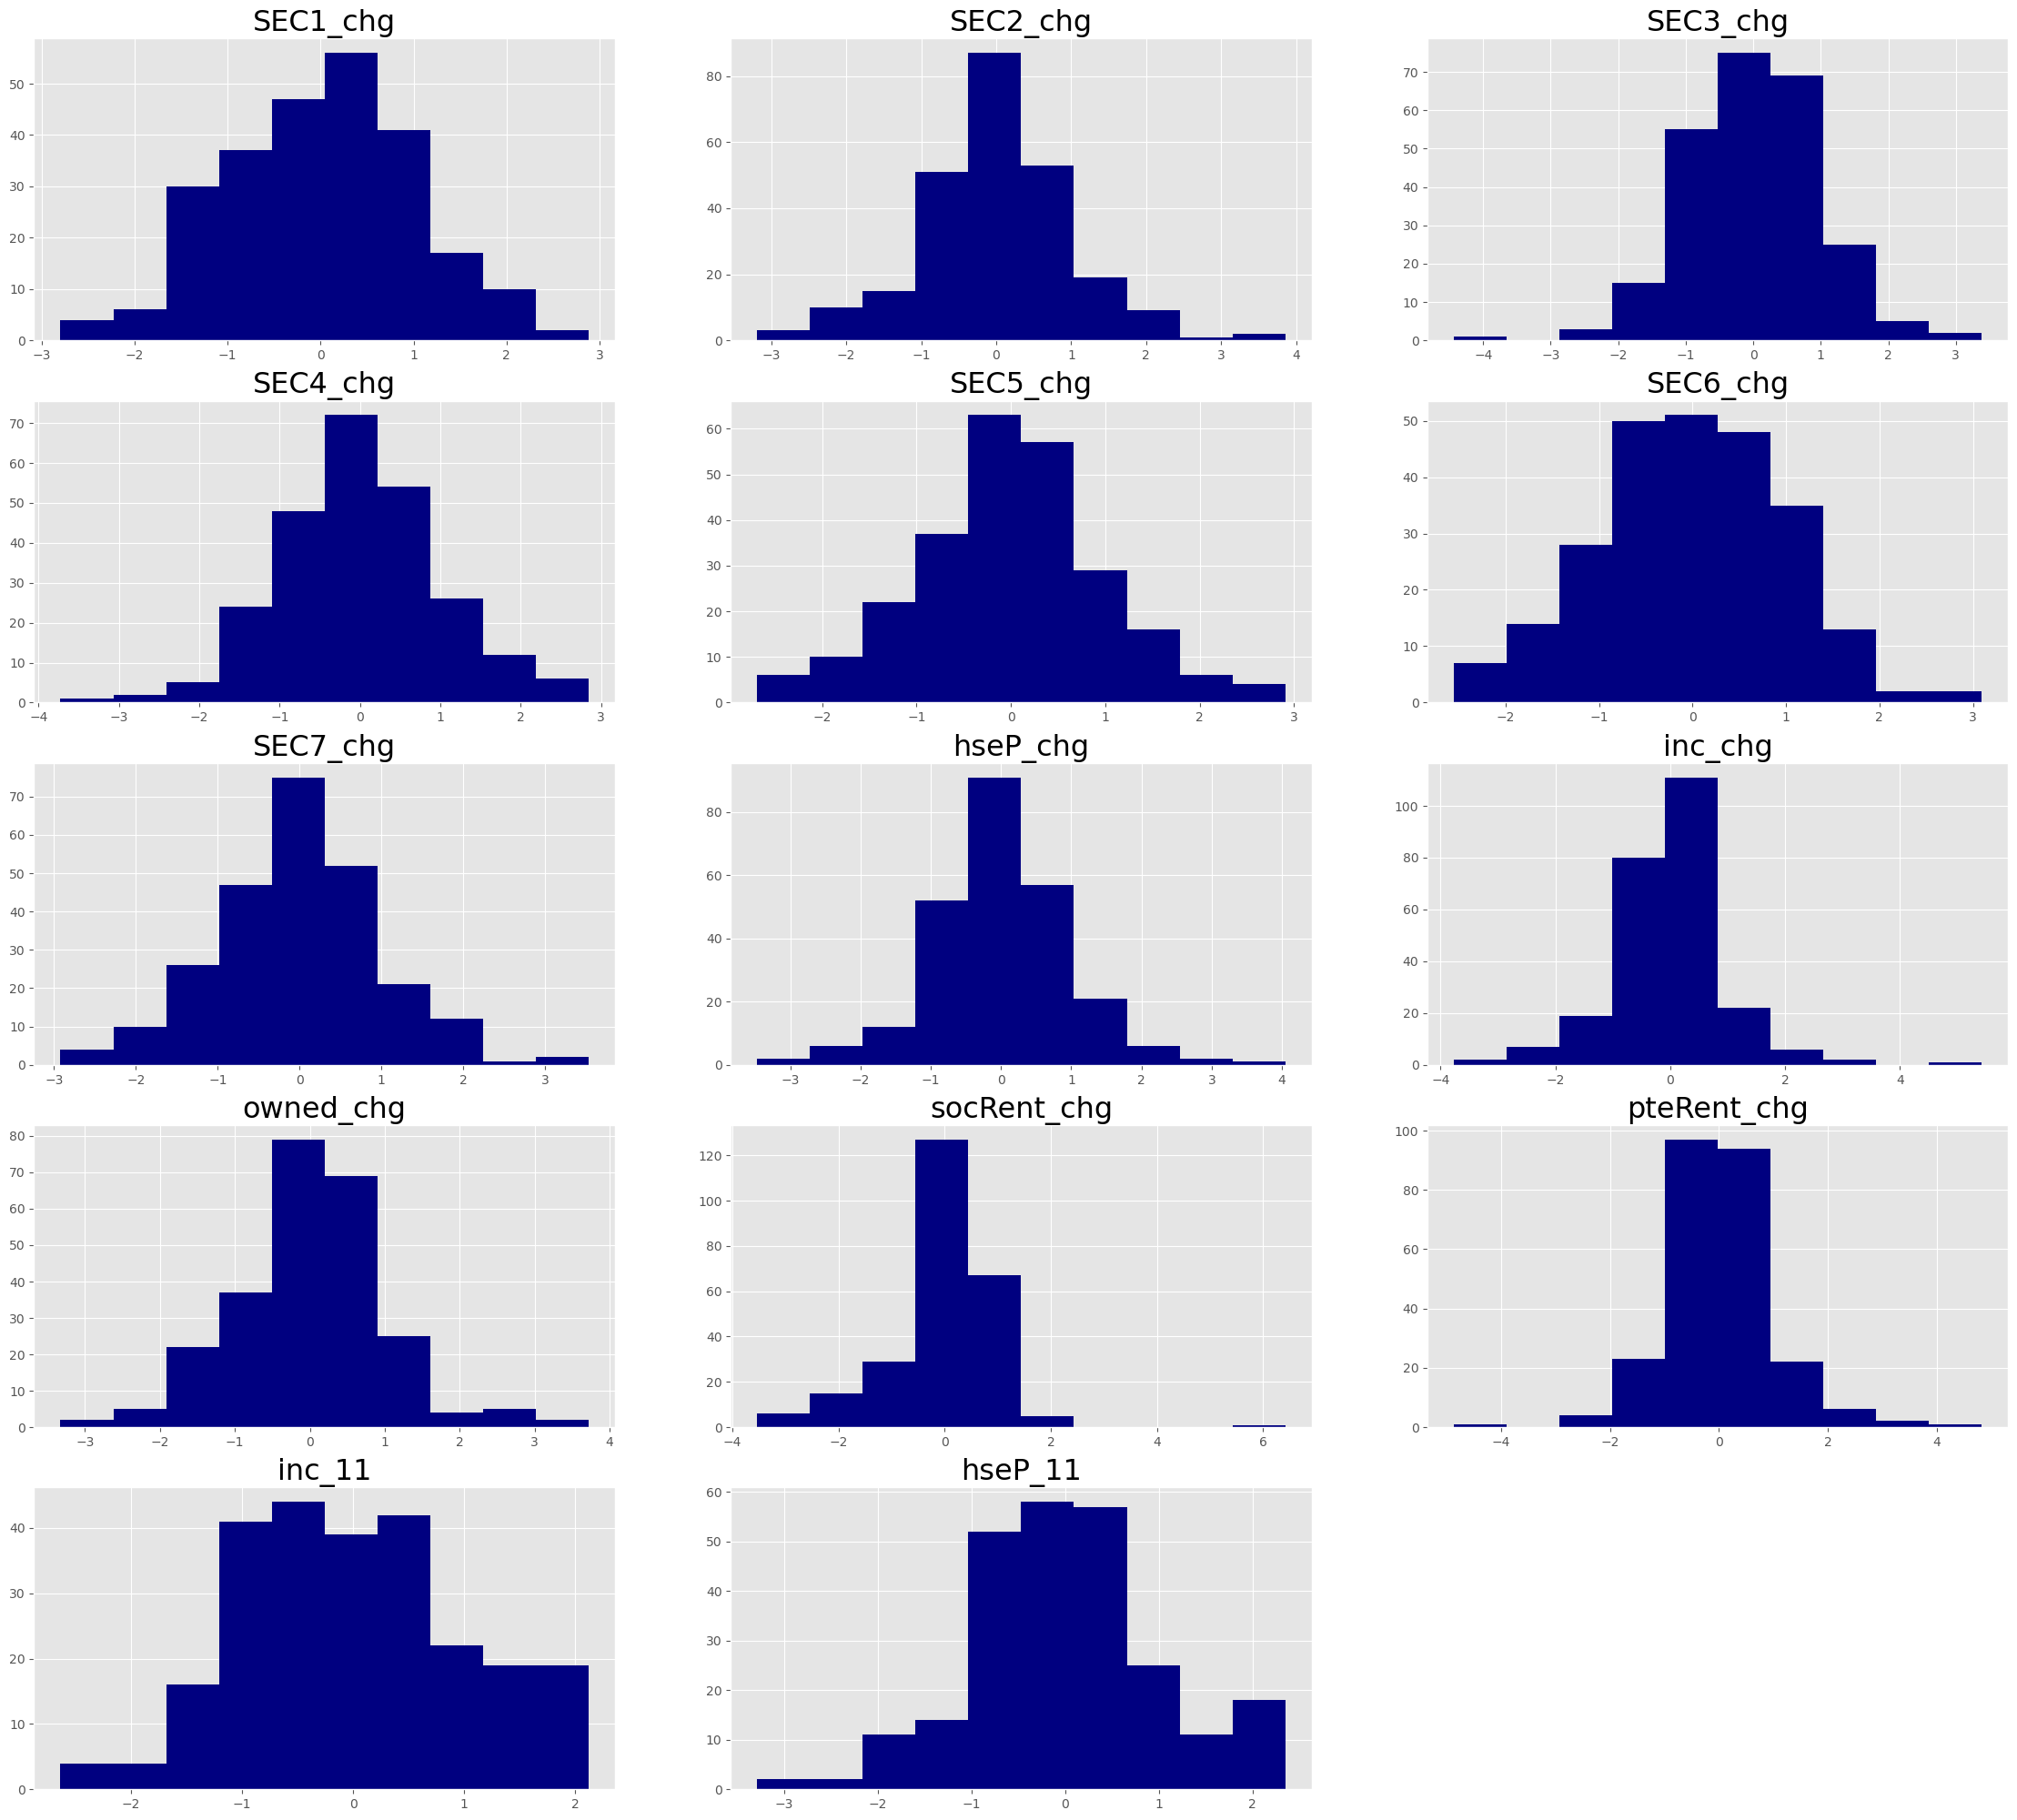

In [20]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(28, 25))

counter = 0
for i in range(5):
    for j in range(3):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_2_yeoJohnson.columns):

            ax.hist(cluster_2_yeoJohnson[cluster_2_yeoJohnson.columns[counter]], label='{}'.format(cluster_2_yeoJohnson.columns[counter]),color='navy')
            ax.set_title(cluster_2_yeoJohnson.columns[counter], fontsize=23)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1
        
#plt.savefig('Cluster_1_hist.png', dpi = 100)
plt.show()

# to output high-resolution image - uncomment the next line


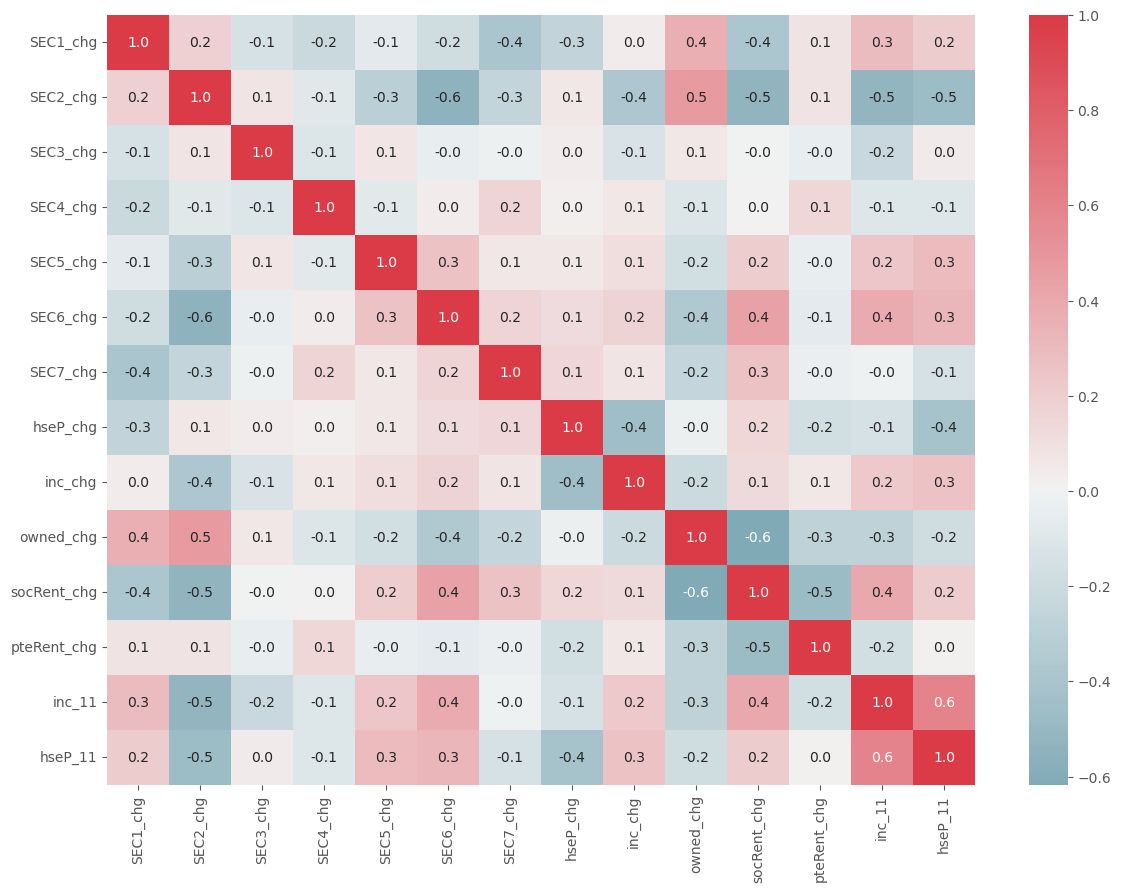

In [21]:
# check for multi-collinearity between variables

fig11, ax = plt.subplots()
fig11.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_2_yeoJohnson.corr(), cmap=cmap, annot=True, fmt=".1f", center=0)

In [22]:
# applying the inverse hyperbolic sine transformation to data variables

cluster_2_invSine = np.arcsinh(cluster_2)

In [23]:
cluster_2_invSine.head()

,SEC1_chg,SEC2_chg,SEC3_chg,SEC4_chg,SEC5_chg,SEC6_chg,SEC7_chg,hseP_chg,inc_chg,owned_chg,socRent_chg,pteRent_chg,inc_11,hseP_11
LSOA_Code,,,,,,,,,,,,,,
E01000121,1.805721,-0.507882,-2.052635,0.748210,-0.010000,-1.243671,0.399304,5.817307,4.014416,-1.402646,-1.084533,2.047570,4.185331,5.991471
E01000126,2.245577,-0.149443,-1.072339,1.452544,-1.120420,-1.053825,1.430138,5.473273,4.260799,2.123413,-1.243671,2.189636,4.035261,5.991221
E01000152,3.123422,2.402475,-1.232975,0.426913,-0.801415,-2.488487,-0.560231,5.526892,3.674328,4.072389,-4.189278,2.160476,4.008390,6.091315
E01000154,2.485182,1.149552,0.159325,-1.090587,-1.773220,-2.393459,-0.463252,5.178142,4.134599,-0.963734,-2.286619,1.827891,3.996702,6.054445
E01000189,3.394963,2.724290,-1.508773,1.698007,-1.205806,-2.486836,-2.144426,4.936684,4.318069,3.606778,-4.257797,3.124300,4.141163,6.186213


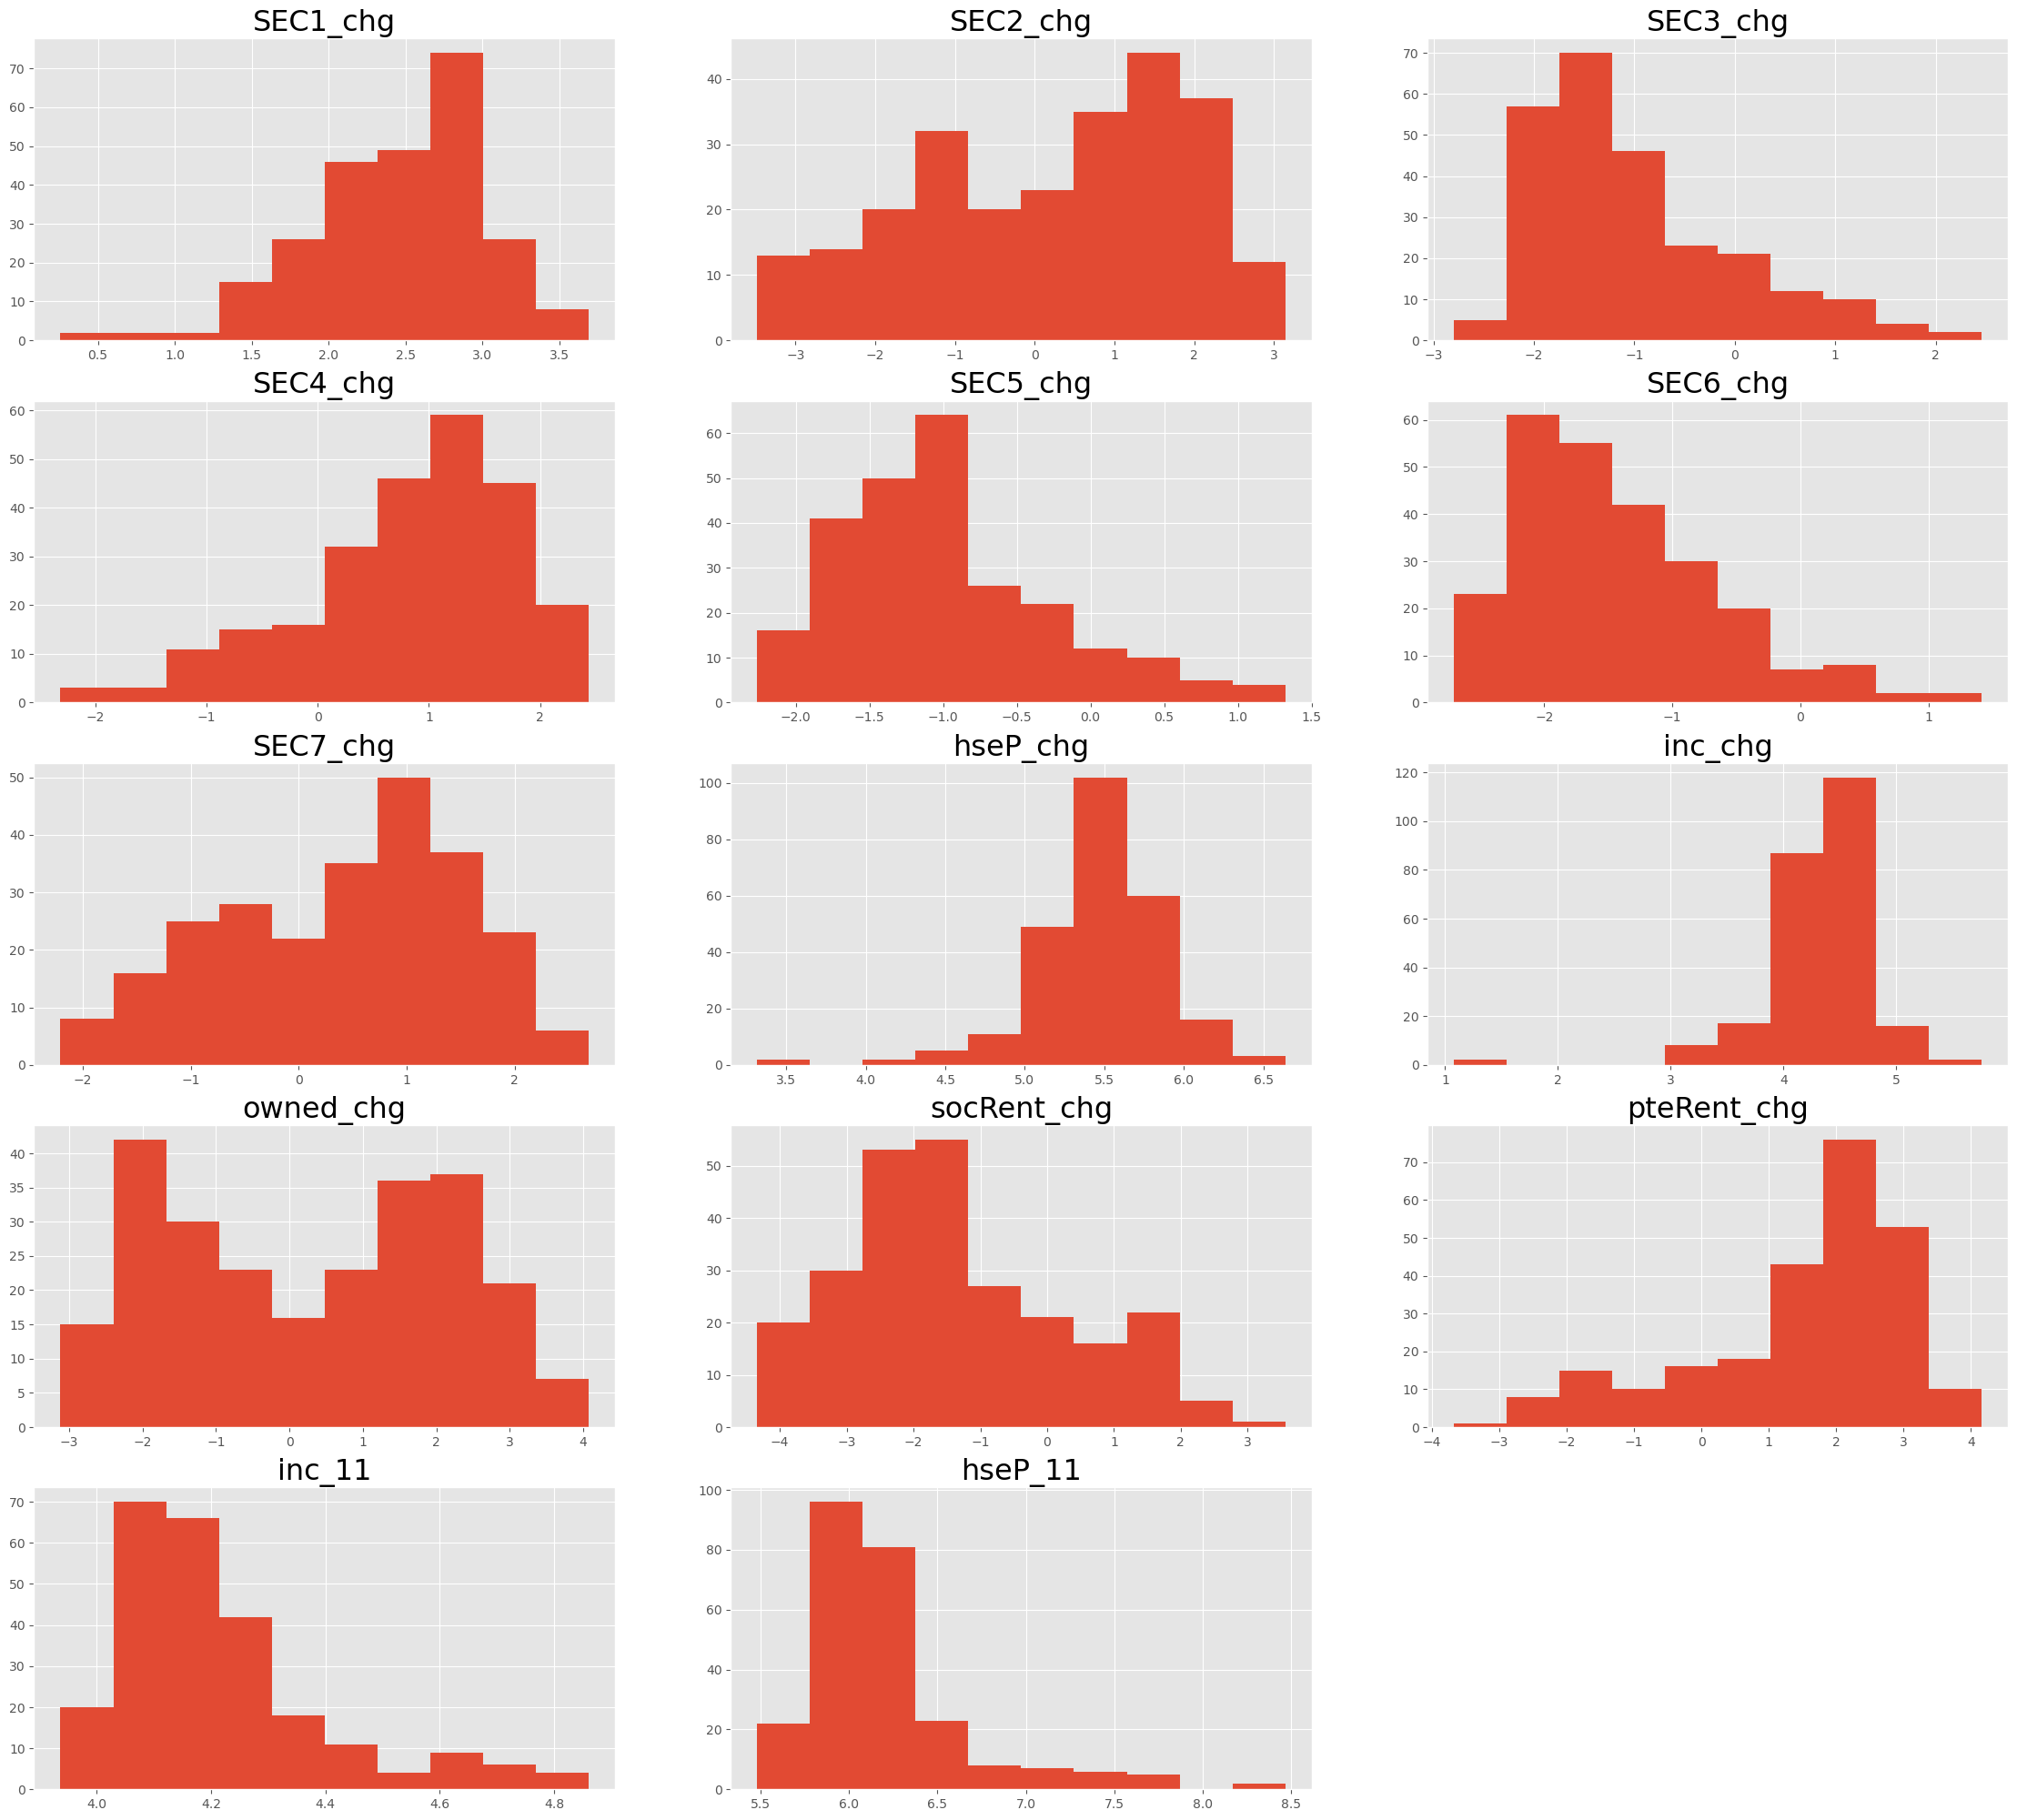

In [24]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(28, 25))

counter = 0
for i in range(5):
    for j in range(3):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_2_invSine.columns):

            ax.hist(cluster_2_invSine[cluster_2_invSine.columns[counter]], label='{}'.format(cluster_2_invSine.columns[counter]))
            ax.set_title(cluster_2_invSine.columns[counter], fontsize=23)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

# to output high-resolution image - uncomment the next line
#plt.savefig('Cluster_1_hist.png', dpi = 100)

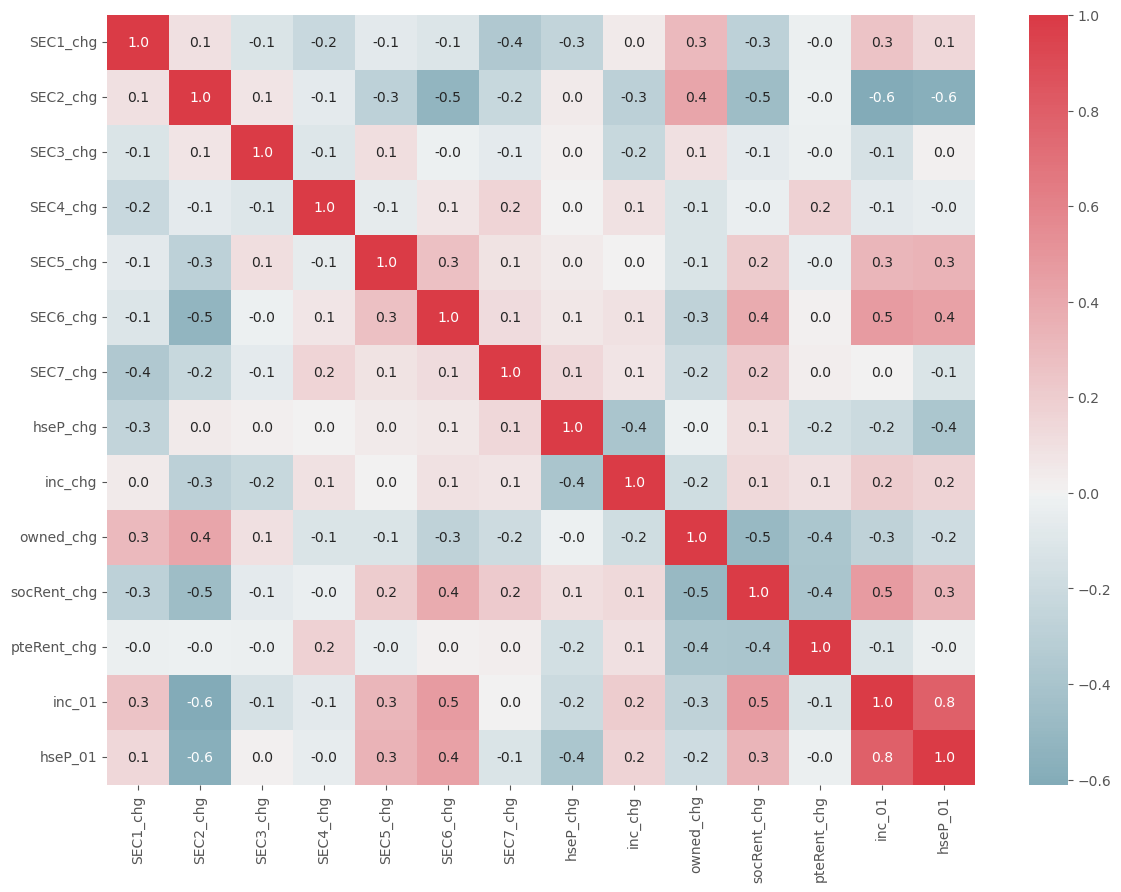

In [24]:
# check for multi-collinearity between variables

fig12, ax = plt.subplots()
fig12.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_2_invSine.corr(), cmap=cmap, annot=True, fmt=".1f", center=0)

In [77]:
## Re-scaling the Input Variables

In [25]:
# applying z-score standardisation on all 4 datasets

from scipy.stats import zscore

cluster_2_noTrans_zscore = cluster_2_noTrans.apply(zscore)
cluster_2_cubeRoot_zscore = cluster_2_cubeRoot.apply(zscore)
cluster_2_yeoJohnson_zscore = cluster_2_yeoJohnson.apply(zscore)
cluster_2_invSine_zscore = cluster_2_invSine.apply(zscore)

In [26]:
# applying RobustScaler (inter-quartile range standardisation) on all 4 datasets

from sklearn.preprocessing import RobustScaler

transformer1 = RobustScaler().fit(cluster_2_noTrans)
cluster_2_noTrans_robust = transformer1.transform(cluster_2_noTrans)
cluster_2_noTrans_robust = pd.DataFrame(cluster_2_noTrans_robust, index = cluster_2_noTrans.index, columns = cluster_2_noTrans.columns)


transformer2 = RobustScaler().fit(cluster_2_cubeRoot)
cluster_2_cubeRoot_robust = transformer2.transform(cluster_2_cubeRoot)
cluster_2_cubeRoot_robust = pd.DataFrame(cluster_2_cubeRoot_robust, index = cluster_2_cubeRoot.index, columns = cluster_2_cubeRoot.columns)


transformer3 = RobustScaler().fit(cluster_2_yeoJohnson)
cluster_2_yeoJohnson_robust = transformer3.transform(cluster_2_yeoJohnson)
cluster_2_yeoJohnson_robust = pd.DataFrame(cluster_2_yeoJohnson_robust, index = cluster_2_yeoJohnson.index, columns = cluster_2_yeoJohnson.columns)


transformer4 = RobustScaler().fit(cluster_2_invSine)
cluster_2_invSine_robust = transformer4.transform(cluster_2_invSine)
cluster_2_invSine_robust = pd.DataFrame(cluster_2_invSine_robust, index = cluster_2_invSine.index, columns = cluster_2_invSine.columns)

In [27]:
# applying RobustScaler (inter-decile range standardisation) on all 4 datasets

transformer5 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_2_noTrans)
cluster_2_noTrans_decile = transformer5.transform(cluster_2_noTrans)
cluster_2_noTrans_decile = pd.DataFrame(cluster_2_noTrans_decile, index = cluster_2_noTrans.index, columns = cluster_2_noTrans.columns)


transformer6 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_2_cubeRoot)
cluster_2_cubeRoot_decile = transformer6.transform(cluster_2_cubeRoot)
cluster_2_cubeRoot_decile = pd.DataFrame(cluster_2_cubeRoot_decile, index = cluster_2_cubeRoot.index, columns = cluster_2_cubeRoot.columns)


transformer7 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_2_yeoJohnson)
cluster_2_yeoJohnson_decile = transformer7.transform(cluster_2_yeoJohnson)
cluster_2_yeoJohnson_decile = pd.DataFrame(cluster_2_yeoJohnson_decile, index = cluster_2_yeoJohnson.index, columns = cluster_2_yeoJohnson.columns)


transformer8 = RobustScaler(quantile_range=(10.0, 90.0)).fit(cluster_2_invSine)
cluster_2_invSine_decile = transformer8.transform(cluster_2_invSine)
cluster_2_invSine_decile = pd.DataFrame(cluster_2_invSine_decile, index = cluster_2_invSine.index, columns = cluster_2_invSine.columns)

In [28]:
# check dataset permutations for heavily-skewed variables

df_full = [cluster_2_noTrans_zscore, cluster_2_cubeRoot_zscore, cluster_2_yeoJohnson_zscore, cluster_2_invSine_zscore, cluster_2_noTrans_robust, cluster_2_cubeRoot_robust, cluster_2_yeoJohnson_robust, cluster_2_invSine_robust, cluster_2_noTrans_decile, cluster_2_cubeRoot_decile, cluster_2_yeoJohnson_decile, cluster_2_invSine_decile]
df_full_name = ["cluster_2_noTrans_zscore", "cluster_2_cubeRoot_zscore", "cluster_2_yeoJohnson_zscore", "cluster_2_invSine_zscore", "cluster_2_noTrans_robust", "cluster_2_cubeRoot_robust", "cluster_2_yeoJohnson_robust", "cluster_2_invSine_robust", "cluster_2_noTrans_decile", "cluster_2_cubeRoot_decile", "cluster_2_yeoJohnson_decile", "cluster_2_invSine_decile"]

for method in range(len(df_full)):
    counter = 0
    for col in range(0,8):
        if df_full[method][df_full[method].columns[col]].skew() > 1:
            counter += 1
        elif df_full[method][df_full[method].columns[col]].skew() <- 1:
            counter += 1
    print(str(df_full_name[method]) + " has " + str(counter) + " variables with skew >1 or <-1 \n")

cluster_2_noTrans_zscore has 1 variables with skew >1 or <-1 

cluster_2_cubeRoot_zscore has 4 variables with skew >1 or <-1 

cluster_2_yeoJohnson_zscore has 0 variables with skew >1 or <-1 

cluster_2_invSine_zscore has 2 variables with skew >1 or <-1 

cluster_2_noTrans_robust has 1 variables with skew >1 or <-1 

cluster_2_cubeRoot_robust has 4 variables with skew >1 or <-1 

cluster_2_yeoJohnson_robust has 0 variables with skew >1 or <-1 

cluster_2_invSine_robust has 2 variables with skew >1 or <-1 

cluster_2_noTrans_decile has 1 variables with skew >1 or <-1 

cluster_2_cubeRoot_decile has 4 variables with skew >1 or <-1 

cluster_2_yeoJohnson_decile has 0 variables with skew >1 or <-1 

cluster_2_invSine_decile has 2 variables with skew >1 or <-1 



C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_

For n_clusters = 2 The average silhouette_score is : 0.8268659904011497
For n_clusters = 3 The average silhouette_score is : 0.8053544820153138
For n_clusters = 4 The average silhouette_score is : 0.7498931329205709
For n_clusters = 5 The average silhouette_score is : 0.39248348314232606
For n_clusters = 6 The average silhouette_score is : 0.3579919282746354
For n_clusters = 7 The average silhouette_score is : 0.3147101002873885
For n_clusters = 8 The average silhouette_score is : 0.29555584775212607
For n_clusters = 9 The average silhouette_score is : 0.29176242044893413
For n_clusters = 10 The average silhouette_score is : 0.30326520510747706


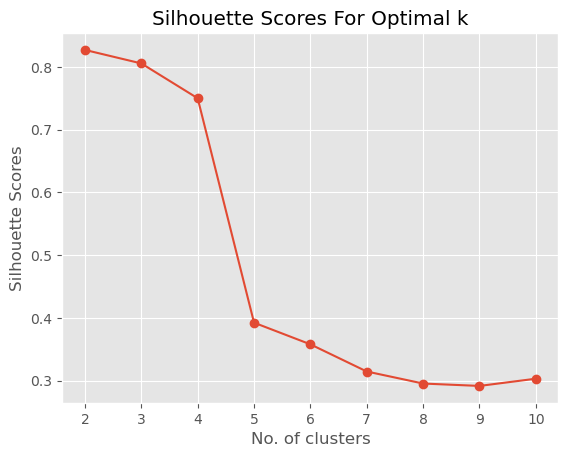

In [29]:
# check and plot silhouette scores to determine the optimal number of clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Sum_of_squared_distances = []
silhouette_scores = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(cluster_2)
    Sum_of_squared_distances.append(clusterer.inertia_)
    
    silhouette_avg = silhouette_score(cluster_2, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
plt.plot(range_n_clusters, silhouette_scores, 'o-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores For Optimal k')
plt.savefig('NO_Gentri_Cluster.png', dpi = 100)
plt.show()

In [30]:
# k-means clustering for yeo-johnson dataset permutations

from sklearn.cluster import KMeans

cluster_2_yeoJohnson_zscore_kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0, n_init=6000, max_iter=80000).fit(cluster_2_yeoJohnson_zscore)
cluster_2_yeoJohnson_robust_kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0, n_init=6000, max_iter=80000).fit(cluster_2_yeoJohnson_robust)
cluster_2_yeoJohnson_decile_kmeans = KMeans(n_clusters=3, init="k-means++", random_state=0, n_init=6000, max_iter=80000).fit(cluster_2_yeoJohnson_decile)

cluster_2_yeoJohnson_zscore_labels = cluster_2_yeoJohnson_zscore_kmeans.labels_
cluster_2_yeoJohnson_robust_labels = cluster_2_yeoJohnson_robust_kmeans.labels_
cluster_2_yeoJohnson_decile_labels = cluster_2_yeoJohnson_decile_kmeans.labels_

C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\apple\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
cluster_2_yJ_zscore_original = cluster_2[:]
cluster_2_yJ_zscore_original["cluster_2_yeoJohnson_zscore_labels"]=cluster_2_yeoJohnson_zscore_labels

C:\Users\apple\AppData\Local\Temp\ipykernel_22500\1806692068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2_yJ_zscore_original["cluster_2_yeoJohnson_zscore_labels"]=cluster_2_yeoJohnson_zscore_labels


In [32]:
cluster_2_yJ_robust_original = cluster_2[:]
cluster_2_yJ_robust_original["cluster_2_yeoJohnson_robust_labels"]=cluster_2_yeoJohnson_robust_labels

C:\Users\apple\AppData\Local\Temp\ipykernel_22500\2885078265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2_yJ_robust_original["cluster_2_yeoJohnson_robust_labels"]=cluster_2_yeoJohnson_robust_labels


In [33]:
cluster_2_yJ_decile_original = cluster_2[:]
cluster_2_yJ_decile_original["cluster_2_yeoJohnson_decile_labels"]=cluster_2_yeoJohnson_decile_labels

C:\Users\apple\AppData\Local\Temp\ipykernel_22500\3732644925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2_yJ_decile_original["cluster_2_yeoJohnson_decile_labels"]=cluster_2_yeoJohnson_decile_labels


In [34]:
# creating empty array to hold the performance measure for each cluster derived from individual dataset permutation

permutation = ["yeoJohnson_zscore", "yeoJohnson_robust","yeoJohnson_decile"]
calinski_harabasz_scores = []

In [35]:
# measuring the performance for yeo-johnson dataset permutations

from sklearn import metrics
from sklearn.metrics import pairwise_distances

print(metrics.calinski_harabasz_score(cluster_2_yJ_zscore_original, cluster_2_yeoJohnson_zscore_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_2_yJ_zscore_original, cluster_2_yeoJohnson_zscore_labels))

print(metrics.calinski_harabasz_score(cluster_2_yJ_robust_original, cluster_2_yeoJohnson_robust_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_2_yJ_robust_original, cluster_2_yeoJohnson_robust_labels))

print(metrics.calinski_harabasz_score(cluster_2_yJ_decile_original, cluster_2_yeoJohnson_decile_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cluster_2_yJ_decile_original, cluster_2_yeoJohnson_decile_labels))

72.0447104420645
79.31887561643565
78.12352478470847


C:\Users\apple\AppData\Local\Temp\ipykernel_22500\4250185772.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(permutation, fontsize=14)


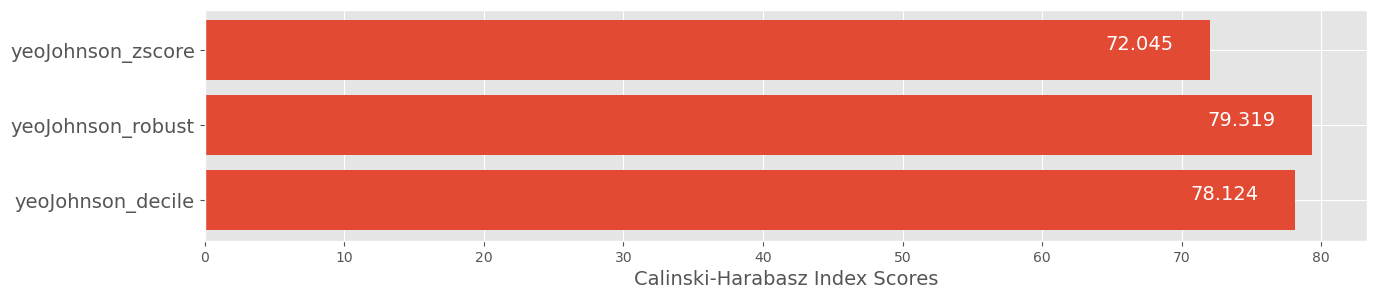

In [36]:
# visualise all performance scores using a barplot

fig, ax = plt.subplots(figsize=(15, 3))

ax.barh(permutation, calinski_harabasz_scores)
#ax.set_yticks(y_pos)
ax.set_yticklabels(permutation, fontsize=14)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Calinski-Harabasz Index Scores', fontsize=14)
#ax.set_title('Quality of Clusters from Different Dataset Permutations')

for i in range(len(permutation)):
    plt.text(x = calinski_harabasz_scores[i]-7.5, y = i, s = calinski_harabasz_scores[i].round(3), size = 14, color='white')

plt.show()

In [58]:
cluster_2_yJ_zscore_original.groupby("cluster_2_yeoJohnson_zscore_labels").size()

cluster_2_yeoJohnson_decile_labels
0     55
1    154
2     41
dtype: int64

C:\Users\apple\AppData\Local\Temp\ipykernel_22500\2344780157.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, polar=True)


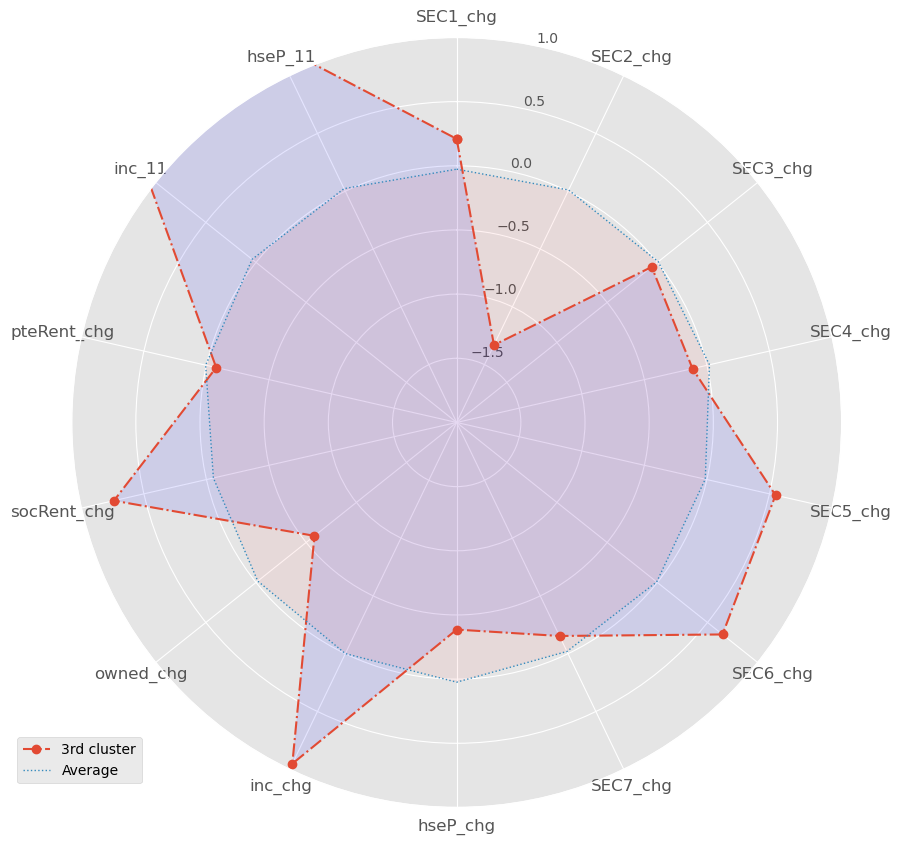

In [71]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 3rd cluster

fig1, ax = plt.subplots()
fig1.set_size_inches(14, 10)

# number of variable
categories=list(radar_3)[1:]
N = len(categories)
 
# plotting for 1st variable
values=radar_3.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variable
categories=list(radar_3)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size = 12)
 
# Draw ylabels
ax.set_rlabel_position(12)
plt.ylim(-2,1)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_3.iloc[2,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='dashdot', marker="o", label="3rd cluster")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=':', label="Average")
ax.fill(angles, values, 'r', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('Super_Gen_Clusters.png', dpi=100)

In [70]:
cluster_2_yeoJohnson_robust["cluster_2_yeoJohnson_robust_labels"]=cluster_2_yeoJohnson_robust_labels
radar_3 = cluster_2_yeoJohnson_robust.groupby("cluster_2_yeoJohnson_robust_labels").mean().reset_index()

In [73]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

In [74]:
# extracting cluster details of the best-performing dataset

cluster_2_yJ_zscore_original.groupby("cluster_2_yeoJohnson_zscore_labels").size()

cluster_2_yeoJohnson_zscore_labels
0    137
1     44
2     69
dtype: int64

In [75]:
print(cluster_2_yJ_decile_original)

           SEC1_chg  SEC2_chg  SEC3_chg  SEC4_chg  SEC5_chg  SEC6_chg  \
LSOA_Code                                                               
E01000121      2.96     -0.53     -3.83      0.82     -0.01     -1.59   
E01000126      4.67     -0.15     -1.29      2.02     -1.37     -1.26   
E01000152     11.34      5.48     -1.57      0.44     -0.89     -5.98   
E01000154      5.96      1.42      0.16     -1.32     -2.86     -5.43   
E01000189     14.89      7.59     -2.15      2.64     -1.52     -5.97   
...             ...       ...       ...       ...       ...       ...   
E01033709      8.78     -5.15     -2.21      2.12     -1.21     -0.72   
E01033710      9.44      1.83     -3.12     -0.57     -0.33     -3.36   
E01033713     13.21      4.02     -2.36     -0.82     -1.42     -2.20   
E01033736      9.40     -9.79     -2.28      2.92     -1.25      0.40   
E01033737      8.33      3.83     -0.74      1.50     -0.96     -0.31   

           SEC7_chg    hseP_chg    inc_chg  owned_

In [76]:
# appending cluster labels to main dataset

cluster_2_yeoJohnson_zscore["cluster_2_yeoJohnson_zscore_labels"]=cluster_2_yeoJohnson_zscore_labels

In [77]:
# creating a new dataset for plotting purposes

radar_2 = cluster_2_yeoJohnson_zscore.groupby("cluster_2_yeoJohnson_zscore_labels").mean().reset_index()

In [78]:
radar_2.head()

,cluster_2_yeoJohnson_zscore_labels,SEC1_chg,SEC2_chg,SEC3_chg,SEC4_chg,SEC5_chg,SEC6_chg,SEC7_chg,hseP_chg,inc_chg,owned_chg,socRent_chg,pteRent_chg,inc_11,hseP_11
0,0,-0.565723,-0.050268,-0.064552,0.254264,-0.063973,0.159202,0.370239,0.337573,-0.149273,-0.237770,0.225105,-0.028508,-0.284239,-0.391967
1,1,0.418517,-1.273243,-0.039558,-0.217295,0.650790,0.875758,-0.093444,-0.430254,0.844680,-0.593104,0.741745,-0.063266,1.515558,1.386844
2,2,0.856368,0.911730,0.153395,-0.366279,-0.287978,-0.874551,-0.675525,-0.395889,-0.242254,0.850305,-0.919944,0.096947,-0.402083,-0.106110


In [79]:
# appending dataset average values to main dataset

radar_avg = cluster_2_yeoJohnson_zscore.drop(columns = ["cluster_2_yeoJohnson_zscore_labels"]).mean().reset_index()

In [80]:
# rename columns for legibility

radar_avg = radar_avg.rename(columns={"index":"var", 0: "value"})

In [81]:
radar_avg.head()

,var,value
0,SEC1_chg,-1.421085e-17
1,SEC2_chg,1.421085e-17
2,SEC3_chg,3.907985e-17
3,SEC4_chg,-2.131628e-17
4,SEC5_chg,4.263256e-17


C:\Users\apple\AppData\Local\Temp\ipykernel_22500\855009222.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, polar=True)


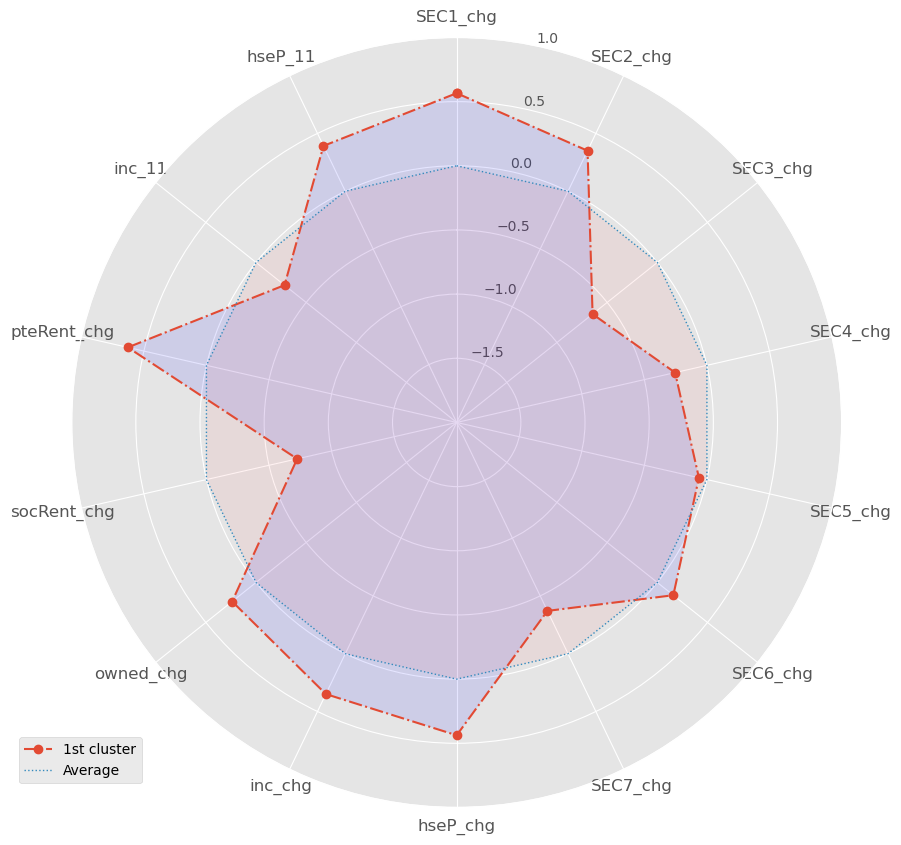

In [98]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 1st cluster

from math import pi

fig1, ax = plt.subplots()
fig1.set_size_inches(14, 10)

# number of variable
categories=list(radar_2)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_2.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variable
categories=list(radar_2)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size = 12)
 
# Draw ylabels
ax.set_rlabel_position(12)
plt.ylim(-2,1)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_2.iloc[0,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='dashdot', marker="o", label="1st cluster")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=':', label="Average")
ax.fill(angles, values, 'r', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('Main_Gen_Clusters.png', dpi=100)

C:\Users\apple\AppData\Local\Temp\ipykernel_22500\855009222.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, polar=True)


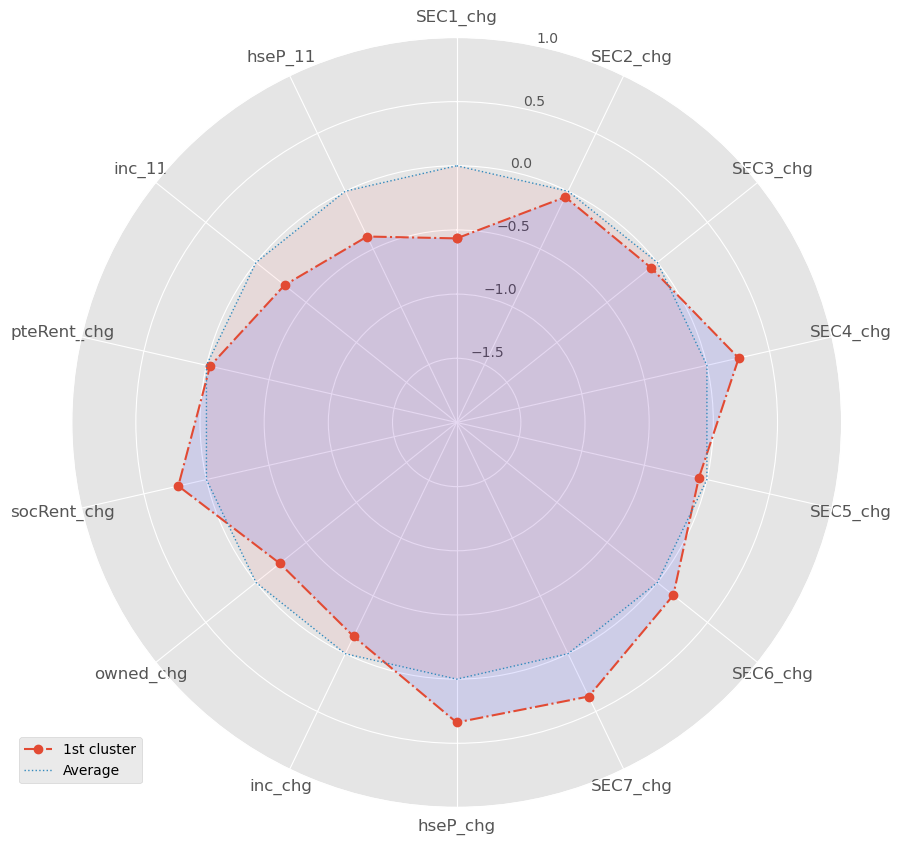

In [86]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 1st cluster

from math import pi

fig1, ax = plt.subplots()
fig1.set_size_inches(14, 10)

# number of variable
categories=list(radar_2)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_2.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variable
categories=list(radar_2)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size = 12)
 
# Draw ylabels
ax.set_rlabel_position(12)
plt.ylim(-2,1)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_2.iloc[0,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='dashdot', marker="o", label="1st cluster")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=':', label="Average")
ax.fill(angles, values, 'r', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('Main_Gen_Clusters.png', dpi=100)

C:\Users\apple\AppData\Local\Temp\ipykernel_22500\3050670540.py:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, polar=True)


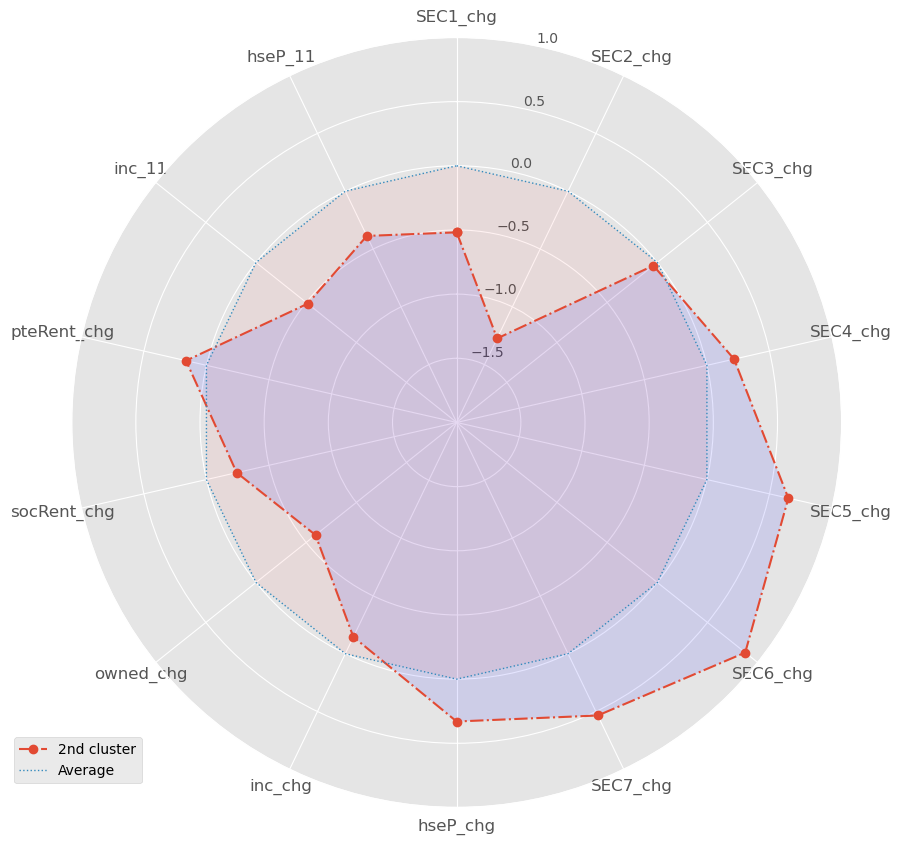

In [93]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 2nd cluster

from math import pi

fig1, ax = plt.subplots()
fig1.set_size_inches(14, 10)

# number of variable
categories=list(radar_2)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_2.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variable
categories=list(radar_2)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size = 12)
 
# Draw ylabels
ax.set_rlabel_position(12)
plt.ylim(-2,1)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_2.iloc[1,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='dashdot', marker="o", label="2nd cluster")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=':', label="Average")
ax.fill(angles, values, 'r', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('Margi_Gen_Clusters.png', dpi=100)

C:\Users\apple\AppData\Local\Temp\ipykernel_22500\2936339652.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, polar=True)


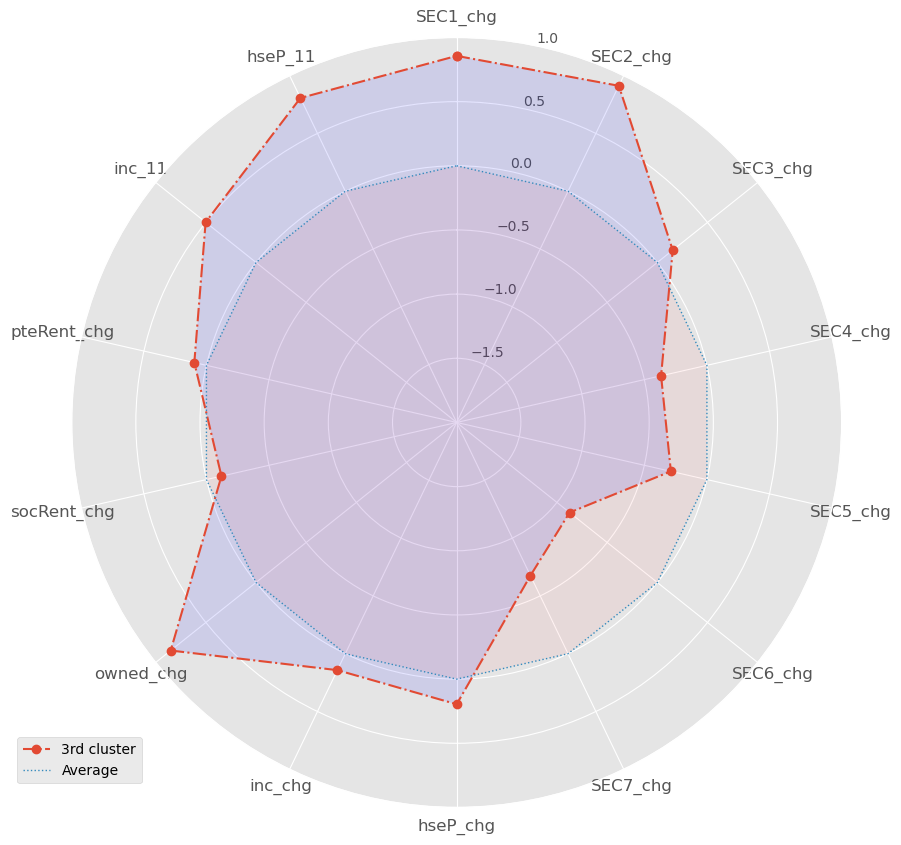

In [94]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 3rd cluster

fig1, ax = plt.subplots()
fig1.set_size_inches(14, 10)

# number of variable
categories=list(radar_2)[1:]
N = len(categories)
 
# plotting for 1st variable
values=radar_2.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variable
categories=list(radar_2)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size = 12)
 
# Draw ylabels
ax.set_rlabel_position(12)
plt.ylim(-2,1)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_2.iloc[2,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1.5, linestyle='dashdot', marker="o", label="3rd cluster")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=':', label="Average")
ax.fill(angles, values, 'r', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.savefig('Super_Gen_Clusters.png', dpi=100)

In [85]:
# parse cluster labels to derive their categories 

cluster_2_yJ_robust_original = cluster_2_yJ_robust_original.reset_index()
cluster_2_yJ_robust_original["cluster_2_yeoJohnson_robust_cat"]=""

for i in range(len(cluster_2_yJ_robust_original)):
    if cluster_2_yJ_robust_original.loc[i, "cluster_2_yeoJohnson_robust_labels"]==0:
        cluster_2_yJ_robust_original.loc[i, "cluster_2_yeoJohnson_robust_cat"]="MargGen"
    elif cluster_2_yJ_robust_original.loc[i, "cluster_2_yeoJohnson_robust_labels"]==1:
        cluster_2_yJ_robust_original.loc[i, "cluster_2_yeoJohnson_robust_cat"]="SupGen"
    elif cluster_2_yJ_robust_original.loc[i, "cluster_2_yeoJohnson_robust_labels"]==2:
        cluster_2_yJ_robust_original.loc[i, "cluster_2_yeoJohnson_robust_cat"]="MainGen"

In [ ]:
cluster_2_yJ_robust_original.head()

In [57]:
# checkpoint - output file
cluster_2_yJ_robust_original.to_csv("cluster_2_yJ_robust_original.csv")

In [87]:
radar_2.to_csv("radar.csv")